In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [5]:
from sklearn.datasets import load_wine

wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)

In [6]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [7]:
wine_df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [11]:
selected_columns = ['alcohol', 'proline']
df_filtered = wine_df[selected_columns]

In [12]:
df_filtered.head()

,alcohol,proline
0,14.23,1065.0
1,13.20,1050.0
2,13.16,1185.0
3,14.37,1480.0
4,13.24,735.0


In [13]:
df_filtered.shape

(178, 2)

In [14]:
X = df_filtered["alcohol"]
y = df_filtered["proline"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
import numpy as np

def ols_regression(x, y):
  """
  Performs linear regression using Ordinary Least Squares.

  Args:
    x: Independent variable.
    y: Dependent variable.

  Returns:
    c: Intercept.
    m: Slope.
  """

  n = len(x)
  x_mean = np.mean(x)
  y_mean = np.mean(y)

  numerator = np.sum((x - x_mean) * (y - y_mean))
  denominator = np.sum((x - x_mean) ** 2)

  m = numerator / denominator
  c = y_mean - m * x_mean

  return c, m

In [33]:
c, m = ols_regression(X_train, y_train)
print("Intercept:", c)
print("Slope:", m)

Intercept: -2234.0901858366474
Slope: 228.75146166302443


In [23]:
y_pred = np.array([c + m * x for x in X_test])

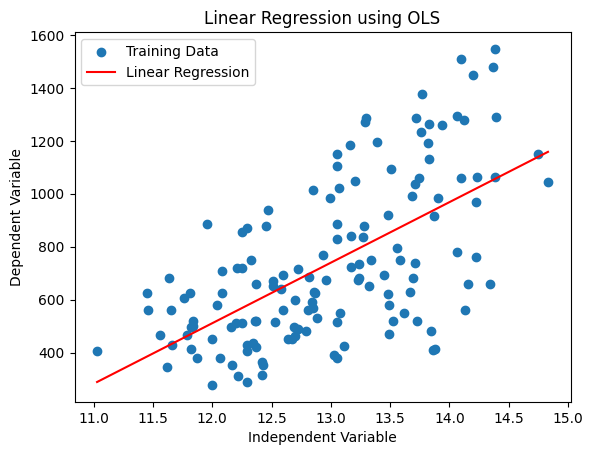

In [32]:
x_line = np.linspace(min(X_train), max(X_train), 100)

y_line = m * x_line + c

plt.scatter(X_train, y_train, label="Training Data")

plt.plot(x_line, y_line, color='red', label="Linear Regression")

plt.xlabel("Independent Variable")
plt.ylabel("Dependent Variable")
plt.title("Linear Regression using OLS")
plt.legend()

plt.show()

In [35]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
19,845.0,886.079751
45,1080.0,1016.468084
140,600.0,723.666213
30,1285.0,906.667383
67,510.0,595.565395
16,1280.0,1037.055716
119,564.0,510.927354
174,750.0,831.179400
109,680.0,421.714284
141,780.0,822.029342


In [28]:
mse = np.mean((y_test - y_pred) ** 2)
print("Mean Squared Error:", mse)

Mean Squared Error: 67066.58876235678


In [27]:
r2 = r2_score(y_test, y_pred)

print("R-squared:", r2)

R-squared: 0.47100096757828325
